# Лабораторная работа
### "Построение модели"

В данной работе предлагается решить задачу мультиклассовой классификации для датасета флагов различных стран  (https://archive.ics.uci.edu/ml/datasets/Flags)


1. Загрузить данные из папки Data Folder
2. Провести описательный анализ предложенных данных
3. Предложить стратегию по работе с категориальными переменными 
4. Провести углубленный анализ данных (корреляции переменных,визуализация взаимосвязей)
5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)
6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)
7. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)
8. Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага 
9. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall  
10. Построить Confusion Matrix для ваших результатов  
11. Рассчитать Feature Importances для переменных модели  

Загрузить ipythonnotebook с результатами работы на github репозиторий

*Пункты,показавшиеся вам сложными, либо которые вы не знаете можно пропускать, но с пометкой в ноутбуке, что показалось сложным и непонятным в данном пункте для вас

### Описание датасета  

Пробежимся по атрибутам (фичам), переведём на русский язык, где это уместно.  

**Информация по атрибутам:**

1. **name**:	Название ('**имя**') соответствующей страны
2. **landmass**: ('**суша**')	**1**=N.America (Северная Америка), **2**=S.America (Южная Америка), **3**=Europe (Европа), **4**=Africa (Африка), **5**=Asia (Азия), **6**=Oceania (Океания - собирательное название обширного скопления островов и атоллов в центральной и западной частях Тихого океана)  
***Ошибка*** в описании датасета для Asia поменял цифру 4 на 5.
3. **zone**: ('**зона**')	Географический квадрант на основе Гринвича и экватора **1**=NE (Северо-Восток), **2**=SE (Юго-Восток), **3**=SW (Юго-Запад), **4**=NW (Северо-Запад)
4. **area**: ('**площадь**')	в тысячах квадратных км
5. **population**: ('**популяция**')	округлена до миллионов
6. **language**: ('**язык**') **1**=English, **2**=Spanish, **3**=French, **4**=German, **5**=Slavic, **6**=Other Indo-European, **7**=Chinese, **8**=Arabic, **9**=Japanese/Turkish/Finnish/Magyar, **10**=Others  
*(следует обратить внимание на пункты 6, 9 и 10 - некие собирательные группы языков. Особенно пункт 9 - ещё из разных континентов, не понятен замысел такого группирования, и языки разделены символом '/')*
7. **religion**: ('**религия**') **0**=Catholic, **1**=Other Christian, **2**=Muslim, **3**=Buddhist, **4**=Hindu,**5**=Ethnic, **6**=Marxist, **7**=Others
8. **bars**: (**'полосы**')        Количество вертикальных полос в флаге  
9. **stripes**: (**'полосы'**)     Количество горизонтальных полос на флаге  
10. **colours**: (**'цвета'**)     Количество различных цветов на флаге  
11. **red**: (**'красный'**)       **0** если красный отсутствует, **1** если красный присутствует на флаге  
12. **green**: (**'зелёный'**)     подобное разделение и для зелёного цвета  
13. **blue**: (**'синий'**)        подобное разделение и для синего цвета  
14. **gold**: (**'золотой'**)      подобное разделение и для золотого цвета (и жёлтый цвет) 
15. **white**: (**'белый'**)       подобное разделение и для белого цвета  
16. **black**: (**'чёрный'**)      подобное разделение и для чёрного цвета  
17. **orange**: (**'оранжевый'**)  подобное разделение и для оранжевого цвета (и коричневый цвет)
18. **mainhue**: (**'главный оттенок'**) преобладающий цвет на флаге (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. **circles**: (**'круги'**)  Число кругов на флаге  
20. **crosses**: (**'кресты'**)  Количество (вертикальных) крестов  
21. **saltires**: (**'X-крест'**) Количество диагональных крестов  
22. **quarters**: (**'секции'**) Количество секций
23. **sunstars**: (**'солнцезвёзды'**) Число символов типа солнце или звезда
24. **crescent**: (**'полумесяц'**) **1** если присутствует символ полумесяц, иначе **0**
25. **triangle**: (**'треугольник'**) **1** если присутствуют треугольники, **0** в ином случае
26. **icon**: (**'значок'**) **1** если присутствует неодушевлённое изображение (например лодка), в ином случае **0**
27. **animate**: (**'одушевлённое'**)  **1** если присутствует одушевлённое изображение (например орёл, дерево, человеческая рука), **0** в ином случае  
28. **text**: (**'текст'**) **1** если присутствуют буквы или что-то написано на флаге (например  девиз или слоган), **0** в ином случае  
29. **topleft**: (**'верхний левый'**) цвет в верхнем левом углу (moving right to decide tie-breaks)
30. **botright**: (**'правый нижний'**) Цвет в правом нижнем углу (moving left to decide tie-breaks)

No missing values (Нет пропущенных значений) Really??? :)

### 1. Загрузить данные из папки Data Folder.

Датасет не имеет названий колонок, следует им дать названия согласно приложенному описанию атрибутов.

In [1]:
cols = ['name','landmass','zone','area','population',
        'language','religion','bars','stripes',
       'colours','red','green','blue','gold','white','black','orange','mainhue',
        'circles','crosses','saltires','quarters','sunstars','crescent','triangle',
        'icon','animate','text','topleft','botright']

In [2]:
import pandas as pd
data = pd.read_csv('flag.data',header=None,names=cols)
data.head()

name  landmass  zone  area  population  language  religion  bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   stripes  colours  ...  saltires  quarters  sunstars  crescent  triangle  \
0        3        5  ...         0         0         1         0         0   
1        0        3  ...         0         0         1         0         0   
2        0        3  ...         0         0         1         1         0   
3        0        5  ...         0         0         0         0         1   
4        0        3  ...         0         0         0         0         0   

   icon  animate text  topleft  botright  
0     1        0    0    black     green  
1     0        1    0      red       red  
2     0        0    0    green     white  
3     1        1    0     blue       red  
4     0        0    0     blue       red  

[5 rows x 30 columns]

### 2. Провести описательный анализ предложенных данных

***Классика:*** info(), shape, describe(), pandas-profiling ;)

###### Рубим с плеча:

In [3]:
import pandas_profiling

[Как ускорить анализ данных с помощью pandas profilling?](https://vc.ru/ml/146033-kak-uskorit-analiz-dannyh-c-pomoshchyu-pandas-profiling)  (Установка, использование, сохранение отчёта - от 29 июля 2020 года публикация)  


In [4]:
data.profile_report()

**Всё визуально очевидно, но по факту семь предупреждений. Одно уникальное значение и шесть атрибутов с большим количеством нулевых значений!**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [6]:
data.shape

(194, 30)

В наших данных **отсутствуют пропуски** (Really!) и изначально **30 атрибутов** для **194 стран**.

In [7]:
data.describe()

landmass        zone          area   population    language  \
count  194.000000  194.000000    194.000000   194.000000  194.000000   
mean     3.572165    2.211340    700.046392    23.268041    5.340206   
std      1.553018    1.308274   2170.927932    91.934085    3.496517   
min      1.000000    1.000000      0.000000     0.000000    1.000000   
25%      3.000000    1.000000      9.000000     0.000000    2.000000   
50%      4.000000    2.000000    111.000000     4.000000    6.000000   
75%      5.000000    4.000000    471.250000    14.000000    9.000000   
max      6.000000    4.000000  22402.000000  1008.000000   10.000000   

         religion        bars     stripes     colours         red  ...  \
count  194.000000  194.000000  194.000000  194.000000  194.000000  ...   
mean     2.190722    0.453608    1.551546    3.463918    0.788660  ...   
std      2.061167    1.038339    2.328005    1.300154    0.409315  ...   
min      0.000000    0.000000    0.000000    1.000000    0.000000  ...   
25%      1.000000    0.000000    0.000000    3.000000    1.000000  ...   
50%      1.000000    0.000000    0.000000    3.000000    1.000000  ...   
75%      4.000000    0.000000    3.000000    4.000000    1.000000  ...   
max      7.000000    5.000000   14.000000    8.000000    1.000000  ...   

          circles     crosses    saltires    quarters    sunstars    crescent  \
count  194.000000  194.000000  194.000000  194.000000  194.000000  194.000000   
mean     0.170103    0.149485    0.092784    0.149485    1.386598    0.056701   
std      0.463075    0.385387    0.290879    0.435860    4.396186    0.231869   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
max      4.000000    2.000000    1.000000    4.000000   50.000000    1.000000   

         triangle        icon     animate        text  
count  194.000000  194.000000  194.000000  194.000000  
mean     0.139175    0.252577    0.201031    0.082474  
std      0.347025    0.435615    0.401808    0.275798  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.750000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 26 columns]

4 атрибута имеют тип object, поэтому в эту подборку не попали (если запускать describe без параметров, то работает только с числовыми типами данных).

Отнесёмся серьёзней к вышепроделанной процедуре и разделим данные по типам данных (у нас тип числовой, но разобъём на подтипы согласно логике кодирования переменных)

In [8]:
black_list = ['name'] #Quod licet Iovi (Jovi), non licet bovi 
categoricals = ['landmass','zone','language','mainhue','topleft','botright']
dummies = ['red','green','blue','gold','white','black','orange','crescent','triangle','icon','animate','text']
continious = ['area', 'population', 'bars', 'stripes', 'colours','circles', 'crosses', 'saltires', 'quarters', 'sunstars']
target = 'religion'

Числовыми по своей сути, а не только по типу имеют следующие атрибуты:

In [9]:
data[continious].describe()

area   population        bars     stripes     colours  \
count    194.000000   194.000000  194.000000  194.000000  194.000000   
mean     700.046392    23.268041    0.453608    1.551546    3.463918   
std     2170.927932    91.934085    1.038339    2.328005    1.300154   
min        0.000000     0.000000    0.000000    0.000000    1.000000   
25%        9.000000     0.000000    0.000000    0.000000    3.000000   
50%      111.000000     4.000000    0.000000    0.000000    3.000000   
75%      471.250000    14.000000    0.000000    3.000000    4.000000   
max    22402.000000  1008.000000    5.000000   14.000000    8.000000   

          circles     crosses    saltires    quarters    sunstars  
count  194.000000  194.000000  194.000000  194.000000  194.000000  
mean     0.170103    0.149485    0.092784    0.149485    1.386598  
std      0.463075    0.385387    0.290879    0.435860    4.396186  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    1.000000  
max      4.000000    2.000000    1.000000    4.000000   50.000000

Стоит обратить внимание на нулевые значения площади (area) и популяции (population).

Данные для стран с 'нулевой?' площадью:

In [10]:
data[data.area == 0]

name  landmass  zone  area  population  language  \
3          American-Samoa         6     3     0           0         1   
4                 Andorra         3     1     0           0         6   
6                Anguilla         1     4     0           0         1   
7         Antigua-Barbuda         1     4     0           0         1   
15               Barbados         1     4     0           0         1   
19                Bermuda         1     4     0           0         1   
24   British-Virgin-Isles         1     4     0           0         1   
33         Cayman-Islands         1     4     0           0         1   
41           Cook-Islands         6     3     0           0         1   
48               Dominica         1     4     0           0         1   
67              Gibraltar         3     4     0           0         1   
70                Grenada         1     4     0           0         1   
71                   Guam         6     1     0           0         1   
94               Kiribati         6     1     0           0         1   
101         Liechtenstein         3     1     0           0         4   
106       Maldive-Islands         5     1     0           0        10   
108                 Malta         3     1     0           0        10   
109              Marianas         6     1     0           0        10   
114                Monaco         3     1     0           0         3   
116            Montserrat         1     4     0           0         1   
119                 Nauru         6     2     0           0        10   
122  Netherlands-Antilles         1     4     0           0         6   
127                  Niue         6     3     0           0         1   
144            San-Marino         3     1     0           0         6   
145              Sao-Tome         4     1     0           0         6   
148            Seychelles         4     2     0           0         1   
158             St-Helena         4     3     0           0         1   
159        St-Kitts-Nevis         1     4     0           0         1   
160              St-Lucia         1     4     0           0         1   
161            St-Vincent         1     4     0           0         1   
176   Turks-Cocos-Islands         1     4     0           0         1   
177                Tuvalu         6     2     0           0         1   
182       US-Virgin-Isles         1     4     0           0         1   
186          Vatican-City         3     1     0           0         6   

     religion  bars  stripes  colours  ...  saltires  quarters  sunstars  \
3           1     0        0        5  ...         0         0         0   
4           0     3        0        3  ...         0         0         0   
6           1     0        1        3  ...         0         0         0   
7           1     0        1        5  ...         0         0         1   
15          1     3        0        3  ...         0         0         0   
19          1     0        0        6  ...         1         1         0   
24          1     0        0        6  ...         1         1         0   
33          1     0        0        6  ...         1         1         4   
41          1     0        0        4  ...         1         1        15   
48          1     0        0        6  ...         0         0        10   
67          1     0        1        3  ...         0         0         0   
70          1     0        0        3  ...         0         0         7   
71          1     0        0        7  ...         0         0         0   
94          1     0        0        4  ...         0         0         1   
101         0     0        2        3  ...         0         0         0   
106         2     0        0        3  ...         0         0         0   
108         0     2        0        3  ...         0         0         0   
109         1     0        0        3  ...         0         0         1   
114         0     0  

Данные для стран с 'нулевой?' популяцией:

In [11]:
data[data.population==0]

name  landmass  zone  area  population  language  \
3          American-Samoa         6     3     0           0         1   
4                 Andorra         3     1     0           0         6   
6                Anguilla         1     4     0           0         1   
7         Antigua-Barbuda         1     4     0           0         1   
12                Bahamas         1     4    19           0         1   
13                Bahrain         5     1     1           0         8   
15               Barbados         1     4     0           0         1   
17                 Belize         1     4    23           0         1   
19                Bermuda         1     4     0           0         1   
24   British-Virgin-Isles         1     4     0           0         1   
25                 Brunei         5     1     6           0        10   
32     Cape-Verde-Islands         4     4     4           0         6   
33         Cayman-Islands         1     4     0           0         1   
39        Comorro-Islands         4     2     2           0         3   
41           Cook-Islands         6     3     0           0         1   
47               Djibouti         4     1    22           0         3   
48               Dominica         1     4     0           0         1   
53      Equatorial-Guinea         4     1    28           0        10   
55                Faeroes         3     4     1           0         6   
56     Falklands-Malvinas         2     3    12           0         1   
60          French-Guiana         2     4    91           0         3   
61       French-Polynesia         6     3     4           0         3   
67              Gibraltar         3     4     0           0         1   
69              Greenland         1     4  2176           0         6   
70                Grenada         1     4     0           0         1   
71                   Guam         6     1     0           0         1   
80                Iceland         3     4   103           0         6   
94               Kiribati         6     1     0           0         1   
101         Liechtenstein         3     1     0           0         4   
102            Luxembourg         3     1     3           0         4   
106       Maldive-Islands         5     1     0           0        10   
108                 Malta         3     1     0           0        10   
109              Marianas         6     1     0           0        10   
113            Micronesia         6     1     1           0        10   
114                Monaco         3     1     0           0         3   
116            Montserrat         1     4     0           0         1   
119                 Nauru         6     2     0           0        10   
122  Netherlands-Antilles         1     4     0           0         6   
127                  Niue         6     3     0           0         1   
141                 Qatar         5     1    11           0         8   
144            San-Marino         3     1     0           0         6   
145              Sao-Tome         4     1     0           0         6   
148            Seychelles         4     2     0           0         1   
151       Soloman-Islands         6     2    30           0         1   
158             St-Helena         4     3     0           0         1   
159        St-Kitts-Nevis         1     4     0           0         1   
160              St-Lucia         1     4     0           0         1   
161            St-Vincent         1     4     0           0         1   
163               Surinam         2     4    63           0         6   
172                 Tonga         6     2     1           0        10   
176   Turks-Cocos-Islands         1     4     0           0         1   
177                Tuvalu         6     2     0           0         1   
182       US-Virgin-Isles         1     4     0           0         1   
185               Vanuatu         6     2    15           0         6   
186   

Нулевые значения для площади и популяции судя по названию стран связано с принятым округлением до целых частей (тысяч квадратых км и миллионов соответственно).

### 3. Предложить стратегию по работе с категориальными переменными

#### Рассмотрим dummies - переменные.

In [12]:
import numpy as np

Проверим есть ли в столбцах данных c введёнными нами dummies-переменными значения, кроме 0 и 1 (иначе прийдется такие строчки предобработать, иные значения не допустимы, естественно)

In [13]:
np.sum(data[dummies].max()!=1) + np.sum(data[dummies].min()!=0)

0

Ура, все значения либо 0, либо 1.

#### Сколько всего категориальных переменных создатся, если использовать атрибуты категориального типа?

In [14]:
total = 0
for cat in categoricals:
    total += len(data[cat].unique())
    print(cat,len(data[cat].unique()))
print('Total:',total)

landmass 6
zone 4
language 10
mainhue 8
topleft 7
botright 8
Total: 43


Всего суммарно 43 категории получится, относительно немного, можно использовать one-hot encoding

### 4. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

Мы никоим образом не затрагивали датасет (пока не делали кодировку и не меняли данные), всё что дал **profile_report** актутально.

Внесём некий анализ в рамки данного пункта.

**Построим тепловую карту.**

In [15]:
import seaborn as sbs
import matplotlib.pyplot as plt

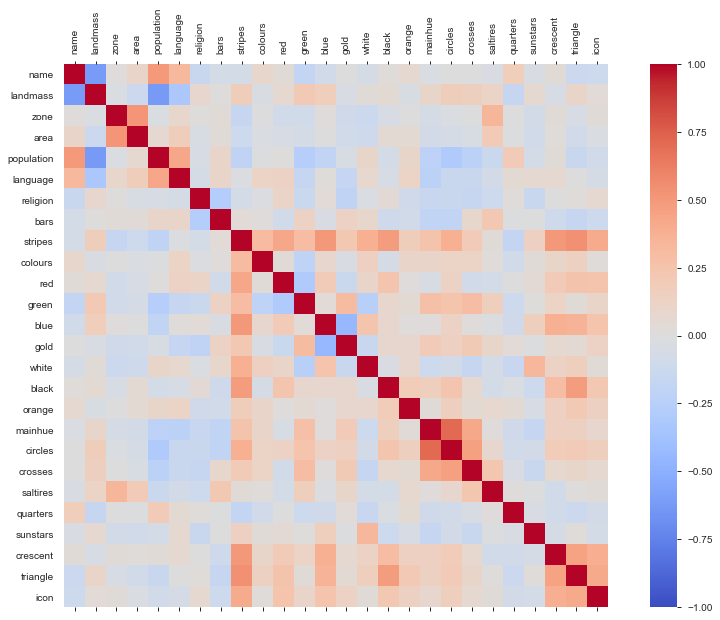

In [16]:
import matplotlib.pyplot as plt

corr = data.drop(['name','topleft','botright'],axis=1).corr()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

Видно, что наибольшим коэффициентом корреляции для целевой переменной (religion) обладают атрибуты (landmass, bars, red, green, gold)

**Визуализируем взаимосвязи** для целевой переменной с атрибутами с наибольшим коэффициентом корреляции

In [ ]:
_ = sbs.pairplot(data = data,vars=['landmass','bars','red','green','gold'], hue='religion')

Из вышеприведенного графика мы можем видеть некоторые корреляции между цветами / столбцами и целевой переменной, но чтобы отделить одну религию от другой, нам нужно предоставить больше характерных особенностей.

### 5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

У нас не так много данных, уменьшать размерность точно нет необходимости, а вот увеличить стоит. :)

### 6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

Назовём целевую переменную своим именем. :)

In [18]:
y = data[target] #target = 'religion' раньшее ввели такую переменную

In [19]:
y.value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

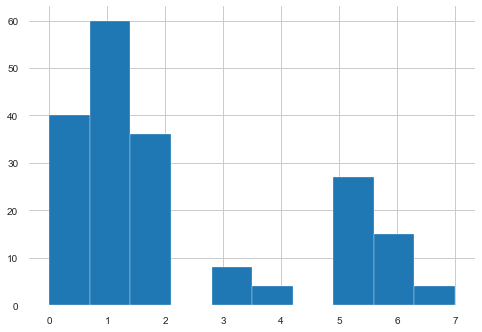

In [20]:
y.hist()

**Классы сильно разбалансированы!** Балансировка классов желательна.

Выделим атрибуты в отдельную переменную

In [21]:
X = pd.concat([data[continious],data[dummies],pd.get_dummies(data[categoricals])],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   area             194 non-null    int64
 1   population       194 non-null    int64
 2   bars             194 non-null    int64
 3   stripes          194 non-null    int64
 4   colours          194 non-null    int64
 5   circles          194 non-null    int64
 6   crosses          194 non-null    int64
 7   saltires         194 non-null    int64
 8   quarters         194 non-null    int64
 9   sunstars         194 non-null    int64
 10  red              194 non-null    int64
 11  green            194 non-null    int64
 12  blue             194 non-null    int64
 13  gold             194 non-null    int64
 14  white            194 non-null    int64
 15  black            194 non-null    int64
 16  orange           194 non-null    int64
 17  crescent         194 non-null    int64
 18  triangle  

### 7. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)

Попробуем первоначально работать с несбалансированными данными, проведя особой разделение классов на несбалансированной выборке.

### [StratifiedShuffledSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)
при разделении выборки учитывает баланс классов, в отличии от традиционного train_test_split'а.  
На несбалансированных выборках стот применять для поддержания баланса классов в тестовой и трейновой выборке

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=.2)
for trn_idx,tst_idx in sss.split(X,y):
    X_train,y_train = X.iloc[trn_idx],y.iloc[trn_idx]
    X_test,y_test = X.iloc[tst_idx],y.iloc[tst_idx]
    
assert len(X_train)+len(X_test) == len(y_train)+len(y_test) == len(X) == len(y)

## Базовая модель

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
rfc = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=100,n_jobs=-1,random_state=42)

score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42).split(X_train,y_train):
    X_train_fold,y_train_fold = X.iloc[trn_idx],y.iloc[trn_idx]
    X_test_fold,y_test_fold = X.iloc[tst_idx],y.iloc[tst_idx]
    rfc.fit(X_train_fold,y_train_fold)
    score_on_train += rfc.score(X_test_fold,y_test_fold)

rfc.fit(X_train,y_train)
print (score_on_train/3)
print(rfc.score(X_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.5806938159879337
0.5128205128205128


## Особенности пространства атрибутов  
(меняем количество атрибутов)

### [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)  
строит степени признаков. Это помогает лучше обучить модели, когда зависимость от признака не линейная, а например квадратичная (сила света убывает пропорционально квадрату расстояния до источника и т.п.)


Увеличим количество атрибутов с помощью PolynomialFeatures

In [24]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3,interaction_only=True,include_bias=False)
X_poly = pd.concat([pd.DataFrame(pf.fit_transform(X[continious])),data[dummies],pd.get_dummies(data[categoricals])],axis=1)
X_poly.head()

0     1    2    3    4    5    6    7    8    9  ...  topleft_red  \
0   648.0  16.0  0.0  3.0  5.0  0.0  0.0  0.0  0.0  1.0  ...            0   
1    29.0   3.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  1.0  ...            1   
2  2388.0  20.0  2.0  0.0  3.0  0.0  0.0  0.0  0.0  1.0  ...            0   
3     0.0   0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  ...            0   
4     0.0   0.0  3.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  ...            0   

   topleft_white  botright_black  botright_blue  botright_brown  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   botright_gold  botright_green  botright_orange  botright_red  \
0              0               1                0             0   
1              0               0                0             1   
2              0               0                0             0   
3              0               0                0             1   
4              0               0                0             1   

   botright_white  
0               0  
1               0  
2               1  
3               0  
4               0  

[5 rows x 213 columns]

На выборке для несбаласнированных классов проведём расщепление на тренировочный и тестовый тест по индексам:

In [25]:
for trn_idx,tst_idx in sss.split(X_poly,y):
    X_train_poly,y_train_poly = X_poly.iloc[trn_idx],y.iloc[trn_idx]
    X_test_poly,y_test_poly = X_poly.iloc[tst_idx],y.iloc[tst_idx]

Возьмём в качестве модели RandomForestClassifier и определим точность модели по метрике score.

In [26]:
rfc = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=100,n_jobs=-1,random_state=42)

score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42).split(X_train_poly,y_train_poly):
    X_train_fold,y_train_fold = X_poly.iloc[trn_idx],y.iloc[trn_idx]
    X_test_fold,y_test_fold = X_poly.iloc[tst_idx],y.iloc[tst_idx]
    rfc.fit(X_train_fold,y_train_fold)
    score_on_train += rfc.score(X_test_fold,y_test_fold)

rfc.fit(X_train_poly,y_train_poly)
print (score_on_train/3) # среднее значение по трём фолдам
print(rfc.score(X_test_poly,y_test_poly)) # качество без разделения

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.49685771744595275
0.5641025641025641


Теперь с помощью метода PCA уменьшим втрое количество компонент.

In [27]:
from sklearn.decomposition import PCA
X_pca = pd.DataFrame(PCA(n_components=round(len(X.columns)/3)).fit_transform(X))

In [28]:
for trn_idx,tst_idx in sss.split(X_pca,y):
    X_train_pca,y_train_pca = X_pca.iloc[trn_idx],y.iloc[trn_idx]
    X_test_pca,y_test_pca = X_pca.iloc[tst_idx],y.iloc[tst_idx]

Обучим модель RandomForestClassifier в тех же условиях.

In [29]:
rfc = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=100,n_jobs=-1,random_state=42)

score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42).split(X_train_pca,y_train_pca):
    X_train_fold,y_train_fold = X_pca.iloc[trn_idx],y.iloc[trn_idx]
    X_test_fold,y_test_fold = X_pca.iloc[tst_idx],y.iloc[tst_idx]
    rfc.fit(X_train_fold,y_train_fold)
    score_on_train += rfc.score(X_test_fold,y_test_fold)

rfc.fit(X_train_pca,y_train_pca)
print (score_on_train/3)
print(rfc.score(X_test_pca,y_test_pca))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.47096530920060325
0.48717948717948717


Увеличение и уменьшение признакового пространства особо не улучшает точность модели.

---

## Балансировка класса  
У нас по классам максимальное значение 60, минимальное 3. Имеет смысле делать **только oversampling** (увеличение количества классов до максимального значения). **Undersampling не имеет смысл проводить**, у нас итак очень маленький датасет по количеству строк.

In [30]:
classes_count = y.value_counts()
max_class_count = classes_count.max()

X_over = X.copy()
y_over = y.copy()

Рандомно раздуваем классы делая выборку и добавляя элементы:

In [31]:
for cls in zip(classes_count,classes_count.index):
    if cls[0] != max_class_count:
        idx = np.random.choice(y[y==cls[1]].index,size = max_class_count-cls[0])
        X_add = X.iloc[idx]
        y_add = y.iloc[idx]
        X_over = X_over.append(X_add)
        y_over = y_over.append(y_add)

In [32]:
y_over.value_counts()

7    60
6    60
5    60
4    60
3    60
2    60
1    60
0    60
Name: religion, dtype: int64

Классы у нас теперь сбалансированы, воспользуемся обычным train_test_split

In [33]:
from sklearn.model_selection import train_test_split
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X_over,y_over,test_size=.2, random_state=42)

Посчитаем точность при тех же параметрах, что и ранее при балансировке класса.

In [34]:
rfc = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=100,n_jobs=-1,random_state=42)

score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42).split(X_train_over,y_train_over):
    X_train_fold,y_train_fold = X_over.iloc[trn_idx],y_over.iloc[trn_idx]
    X_test_fold,y_test_fold = X_over.iloc[tst_idx],y_over.iloc[tst_idx]
    rfc.fit(X_train_fold,y_train_fold)
    score_on_train += rfc.score(X_test_fold,y_test_fold)

rfc.fit(X_train_over,y_train_over)
print (score_on_train/3)
print(rfc.score(X_test_over,y_test_over))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.53125
0.8958333333333334


Результат после передискретизации (oversampling) существенно лучше. Oversampling стоит использовать.

---

### 8. Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага   

#### Обучим модель и сделаем предсказание.  
По-прежнему воспользуемся моделью [**RandomForestClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), дополнительно обернём [**GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) для поиска оптимальных параметров нашей модели

In [35]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200,500,1000],
          'max_depth':[5,10,15,20,30],
          'min_samples_leaf':[1,5,10,20],
          'random_state':[42],
          'n_jobs':[-1]}

rf_grid = GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=1,n_jobs=-1,cv=3)
rf_grid.fit(X_train_over,y_train_over)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

Такая же процедура для другой модели - [**LogisticRegression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [36]:
from sklearn.linear_model import LogisticRegression
params = {'penalty':['l2'],
          'max_iter':[100,500,1000],
          'multi_class':['multinomial'],
          'n_jobs':[-1],
          'C':[0.01,0.1,0.5,1.0],
          'solver':['newton-cg','sag','saga','lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(),param_grid=params,verbose=1,n_jobs=-1,cv=3)
lr_grid.fit(X_train_over,y_train_over)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   16.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0],
                         'max_iter': [100, 500, 1000],
                         'multi_class': ['multinomial'], 'n_jobs': [-1],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, retu

И само предсказание по двум моделям:

In [37]:
rf_pred = rf_grid.predict(X_test_over)
lr_pred = lr_grid.predict(X_test_over)

### 9. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall  

In [38]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [39]:
print (f"ACCURACY  : RF={accuracy_score(y_test_over,rf_pred):.3f}, LR={accuracy_score(y_test_over,lr_pred):.3f}")
print (f"F1-SCORE  : RF={f1_score(y_test_over,rf_pred,average='macro'):.3f}, LR={f1_score(y_test_over,lr_pred,average='macro'):.3f}")
print (f"PRECISION : RF={precision_score(y_test_over,rf_pred,average='macro'):.3f}, LR={precision_score(y_test_over,lr_pred,average='macro'):.3f}")
print (f"RECALL    : RF={recall_score(y_test_over,rf_pred,average='macro'):.3f}, LR={recall_score(y_test_over,lr_pred,average='macro'):.3f}")

ACCURACY  : RF=0.927, LR=0.781
F1-SCORE  : RF=0.923, LR=0.765
PRECISION : RF=0.926, LR=0.764
RECALL    : RF=0.925, LR=0.791


Существенное лидерство за RandomForestClassifier на сбалансированных классах (oversampling)

Выведем лучшие параметры для лидера:

In [40]:
rf_grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'n_estimators': 500,
 'n_jobs': -1,
 'random_state': 42}

### 10. Построить Confusion Matrix для ваших результатов

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test_over,rf_pred)

array([[ 8,  1,  0,  1,  0,  0,  0,  0],
       [ 0, 13,  1,  0,  0,  1,  0,  0],
       [ 0,  0, 11,  1,  0,  1,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15]], dtype=int64)

### 11. Рассчитать Feature Importances для переменных  модели

In [43]:
rf_best = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, n_estimators = 1000, n_jobs= -1, random_state= 42)
rf_best.fit(X_train_over,y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

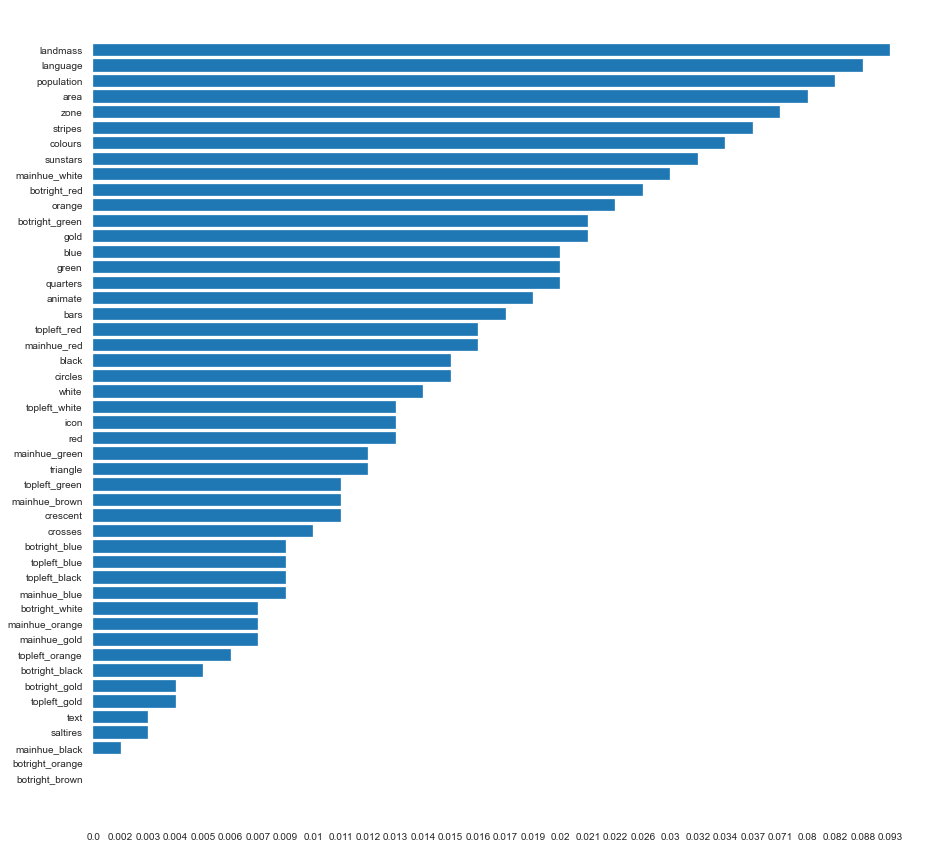

In [44]:
feat_imp_dict = {col:np.round(imp,3) for col,imp in zip(X_over.columns,rf_best.feature_importances_)}
feat_imp_dict = np.array(sorted(feat_imp_dict.items(),key=lambda x:x[1]))
labels = list(feat_imp_dict[:,0])
importances = list(feat_imp_dict[:,1])
y_pos = np.arange(len(labels))

plt.figure(figsize=(15,15))
plt.barh(y_pos,importances,align='center')
plt.yticks(y_pos, labels)
_ = plt.show()

Местоположение, язык, популяция населения и площадь территории самые важные признаки. Но явного лидера нет.  
Можно выделить по группам.  
В этом смысле важней география и численность населения, чем какая-нибудь игра в атрибутику флага.